In [1]:
from zMag_Field import *

import numpy as np


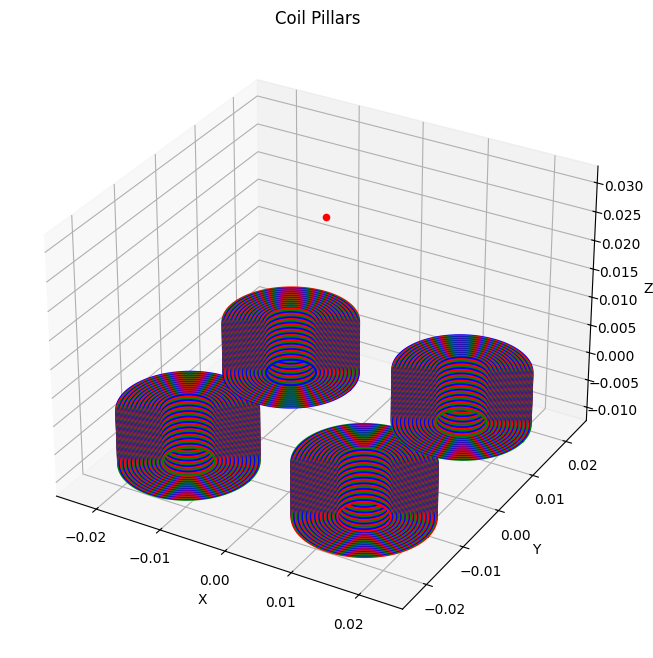

In [2]:
# Generate 4 coil pillars in a square formation with 2cm spacing
coil_pillars = []
square_spacing = 0.027/2  # 2 cm spacing
#positions_X1 = 
positions = [(-square_spacing, -square_spacing, 0), (-square_spacing, square_spacing, 0), 
             (square_spacing, -square_spacing, 0), (square_spacing, square_spacing, 0)]

# 29 coil high
for pos in positions:
    diameter_start = 0.007
    diameter_end = 0.019
    diameter_values = np.linspace(diameter_start, diameter_end, 34)[::-1]

    for diameter in diameter_values:
        # coil_pillars.append(make_coil(current=5, num_coils=370, coil_spacing=0.00033, position=pos, diameter=0.019))
        coil_pillars.append(make_coil(current=-5, num_coils=30 ,coil_spacing=0.00033, position=pos, diameter=diameter))

plot_coil_pillars(coil_pillars)


In [3]:
# Example usage:
target_position = (0.0, 0.0, 0.03)  #  at the origin
B_field = compute_magnetic_field(coil_pillars, target_position)
print(f"Magnetic field at {target_position}: {B_field} T")

# Compute magnetic moment for 25mm x 3.5mm magnet
magnetic_moment = compute_magnetic_moment()

z_magnet = 0.03  # 3 cm above the coils
dBz_dz = compute_magnetic_gradient(coil_pillars, (0.0, 0.0, z_magnet))

print(f"Magnetic gradient on the weightless magnet: {np.round(dBz_dz, 3)} N")
print(f"Total Magnetic force on the magnet due to coils: {np.round((dBz_dz* magnetic_moment), 3)} N")


Magnetic field at (0.0, 0.0, 0.03): [ 3.35168290e-18  3.87660510e-18 -6.06901875e-03] T
Magnetic gradient on the weightless magnet: 0.265 N
Total Magnetic force on the magnet due to coils: 0.547 N


In [4]:
f = magnetic_field(5, 5, -5, 5, magnetic_moment)
normal_floats = tuple(float(x) for x in f)
print(normal_floats)

(0.548, 0.548, -1.094)


In [5]:
mass = 1.0  # Mass of the object (in kg)
dt = 0.01  # Small time step (in seconds)
starting_pos = (0.0, 0.0, z_magnet) 

new_position = update_position(starting_pos, f, mass, dt)
print(new_position)

(np.float64(2.7400000000000002e-05), np.float64(2.7400000000000002e-05), np.float64(0.029945299999999998))


In [ ]:
def create_positions(starting_pos, f, mass, steps):
    pos = starting_pos
    pos_list = []
    for i in steps:
        pos_list.append(pos)
        pos = update_position(pos, f, mass, 0.1)

    return pos_list

frames =  range(100)
pos_list = create_positions(starting_pos, f , mass, frames)

NameError: name 'animation' is not defined

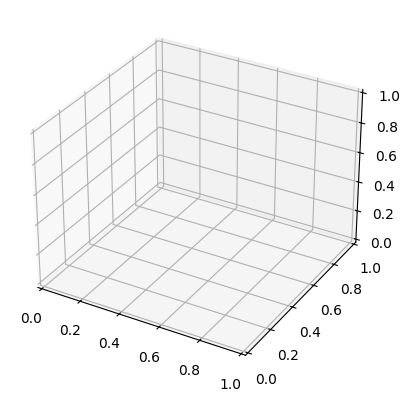

In [ ]:

animate_particle(positions, frames)